# Credit Card Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Z:/Study/ziggy std/Mr. Prakash Senapathi/task/TASK - 14_svm/creditcardfraud/creditcard.csv")
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#checking null values
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

there is no null value in above dataset

In [5]:
df_fraud=dataset[dataset['Class']==1]
df_fraud.shape

(492, 31)

(0.0, 2500.0)

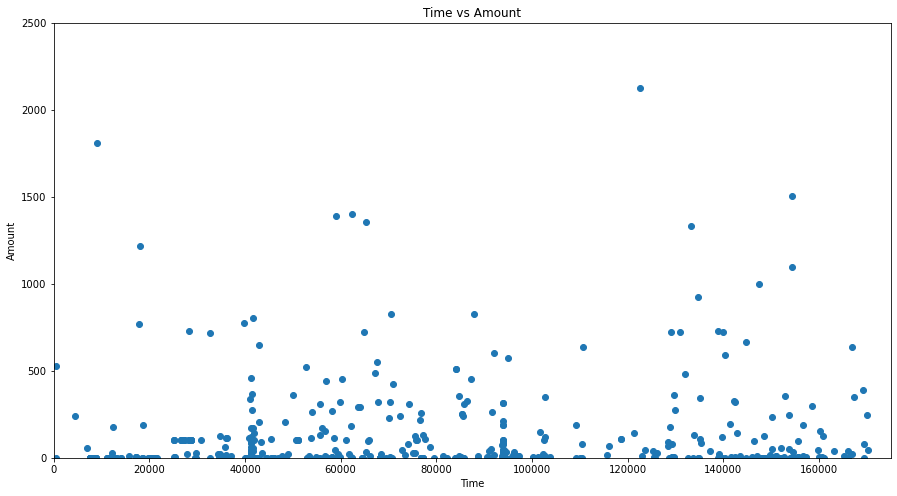

In [6]:
plt.figure(figsize=(15,8))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])

plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Time vs Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])


In [7]:
big_fraud=df_fraud[df_fraud['Amount']>1000].shape[0]
print(f"There are {big_fraud} fraud when Amount is greater than 1000 over {df_fraud.shape[0]}")


There are 9 fraud when Amount is greater than 1000 over 492


# Unbalance and Balanced Dataset
1. If our dataset contains approximately equal amount of positive and negative data then it’s called as balanced data.
1. If there is the very high different between the positive values and negative values. Then we can say our dataset in Imbalance Dataset.

In [8]:
no_fraud=len(dataset[dataset.Class==0])
fraud=len(dataset[dataset.Class==1])
print(f"There are {fraud} fraud and {no_fraud} are not fraud from {dataset.shape[0]} of total dataset")

There are 492 fraud and 284315 are not fraud from 284807 of total dataset


We can see that here is very difference in fraud and not fraud datasets

# Correlation

In [9]:
df_corr = dataset.corr()
df_corr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447


Text(0.5, 1.0, 'Heatmap correlation')

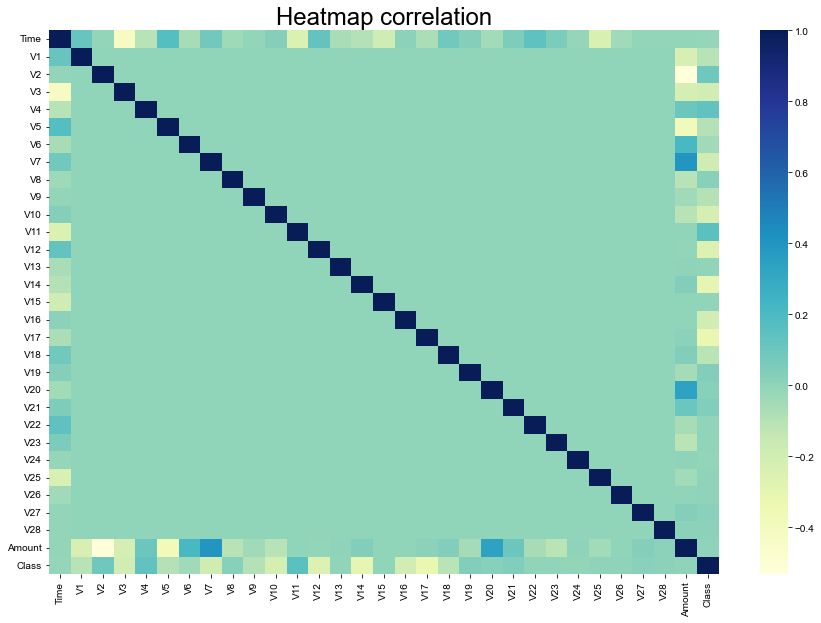

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap="YlGnBu")
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')

In [70]:
rank = df_corr['Class']
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False)                                                                   
df_rank.dropna(inplace=True)

# UnderSampling

In [71]:
df_train_all = dataset[0:150000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print(f'In this dataset, we have {len(df_train_1)}  frauds so we need to take a similar number of non-fraud')

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds.
df_train = df_train.sample(frac=1)

In this dataset, we have 293  frauds so we need to take a similar number of non-fraud


In [72]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [73]:
df_test_all = dataset[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

# Confusion Matrix

In [74]:
X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank)
############################## with all the test dataset to see if the model learn correctly ##################
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

In [75]:
class_names=np.array(['0','1']) 

In [76]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


In [77]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

In [78]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [79]:
prediction_SVM_all = classifier.predict(X_test_all)
cm = confusion_matrix(y_test_all, prediction_SVM_all)

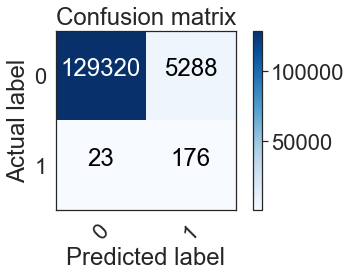

In [80]:
plot_confusion_matrix(cm,class_names)


In [81]:
print(f'We have detected  {cm[1][1]}   frauds  {cm[1][1]+cm[1][0]} total frauds.')
print(f'\nSo, the probability to detect a fraud is {cm[1][1]/(cm[1][1]+cm[1][0])}')
print(f"the accuracy is : {(cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))} ")

We have detected  176   frauds  199 total frauds.

So, the probability to detect a fraud is 0.8844221105527639
the accuracy is : 0.9606029360493149 


# Models Rank

In [82]:
classifier.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier.predict(X_test_all_rank)

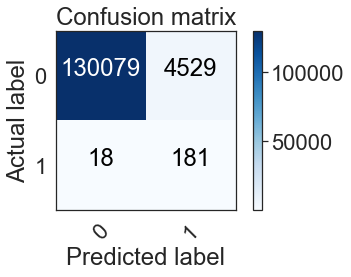

In [83]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [84]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9208922504620695


In [92]:
print(f'We have detected  {cm[1][1]}   frauds  {cm[1][1]+cm[1][0]} total frauds.')
print(f'\nSo, the probability to detect a fraud is {cm[1][1]/(cm[1][1]+cm[1][0])}')
print(f"the accuracy is : {(cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))} ")

We have detected  176   frauds  199 total frauds.

So, the probability to detect a fraud is 0.8844221105527639
the accuracy is : 0.9703205323165711 


# Re-balanced class weight

In [93]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})
classifier_b.fit(X_train, y_train)

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

# Testing the model

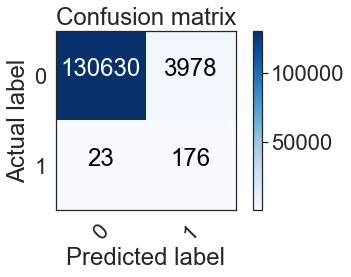

In [94]:
prediction_SVM_b_all = classifier_b.predict(X_test_all) #We predict all the data set.
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [91]:
print(f'We have detected  {cm[1][1]}   frauds  {cm[1][1]+cm[1][0]} total frauds.')
print(f'\nSo, the probability to detect a fraud is {cm[1][1]/(cm[1][1]+cm[1][0])}')
print(f"the accuracy is : {(cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))} ")

We have detected  176   frauds  199 total frauds.

So, the probability to detect a fraud is 0.8844221105527639
the accuracy is : 0.9703205323165711 


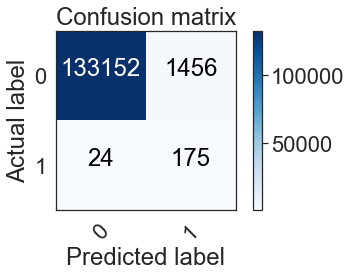

In [95]:
classifier_b.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier_b.predict(X_test_all_rank) #And finally, we predict our data test.
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [96]:
print(f'We have detected  {cm[1][1]}   frauds  {cm[1][1]+cm[1][0]} total frauds.')
print(f'\nSo, the probability to detect a fraud is {cm[1][1]/(cm[1][1]+cm[1][0])}')
print(f"the accuracy is : {(cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))} ")

We have detected  175   frauds  199 total frauds.

So, the probability to detect a fraud is 0.8793969849246231
the accuracy is : 0.9890213416217258 
